## Loading Dataset

In [ ]:
import seaborn as sns
import pandas as pd

# Load the  dataset
df = sns.load_dataset("taxis")

# Preview the first 5 rows
print(df.head())

# Show basic info
print(df.info())


               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

## Handling missing values

In [ ]:
# Count missing values in each column
missing = df.isnull().sum()
print("Missing values per column:\n", missing)


Missing values per column:
 pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [ ]:
# Impute missing numerical values
df['tip'] = df['tip'].fillna(df['tip'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())

# Impute missing categorical values
df['pickup_borough'] = df['pickup_borough'].fillna(df['pickup_borough'].mode()[0])
df['payment'] = df['payment'].fillna(df['payment'].mode()[0])


In [ ]:
# Drop rows where 'fare' or 'pickup' is missing (if any)
df.dropna(subset=['fare', 'pickup'], inplace=True)


In [ ]:
# Check again to confirm all missing values handled
print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment             0
pickup_zone        26
dropoff_zone       45
pickup_borough      0
dropoff_borough    45
dtype: int64


### Visualization with Matplolib and pandas

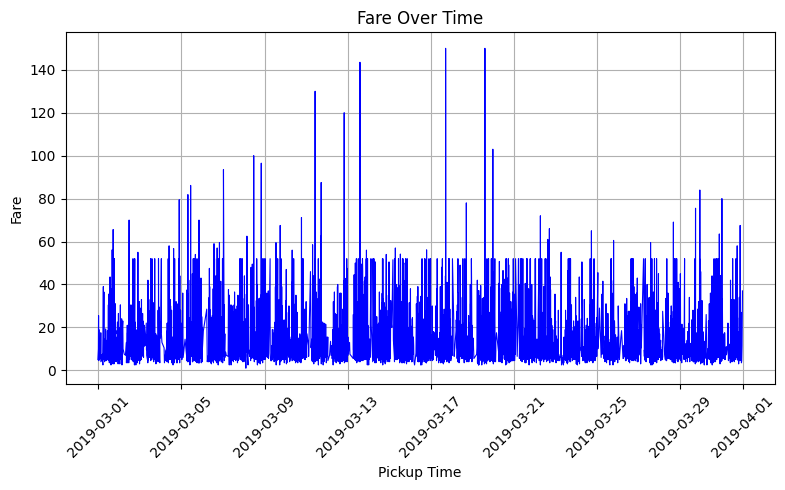

In [ ]:
import matplotlib.pyplot as plt

# Ensure pickup is datetime
df['pickup'] = pd.to_datetime(df['pickup'])

# Sort by pickup time
df_sorted = df.sort_values('pickup')

# Plot
plt.figure(figsize=(8,5))
plt.plot(df_sorted['pickup'], df_sorted['fare'], color='blue', linewidth=0.8)
plt.title('Fare Over Time')
plt.xlabel('Pickup Time')
plt.ylabel('Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


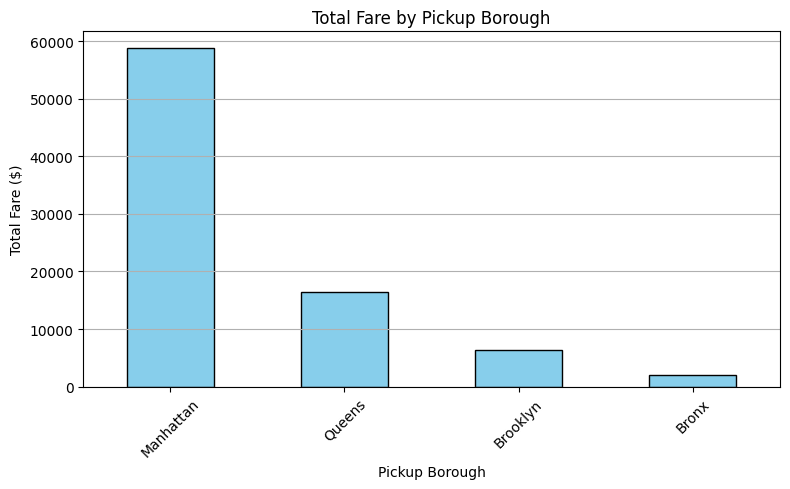

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the 'taxis' dataset
df = sns.load_dataset("taxis")


# Ensure pickup is datetime
df['pickup'] = pd.to_datetime(df['pickup'])

# Sort by pickup time
df_sorted = df.sort_values('pickup')


# Group by pickup_borough and sum fare
fare_by_borough = df.groupby('pickup_borough')['fare'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,5))
fare_by_borough.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Fare by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Total Fare ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


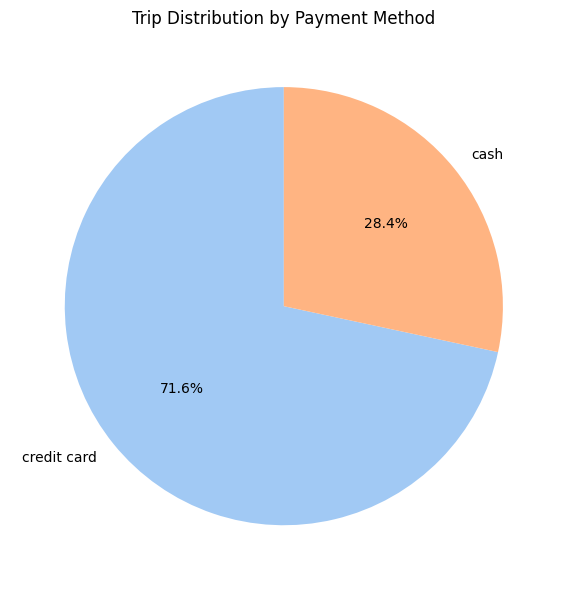

In [ ]:
#piechart
# Count of trips by payment method
payment_counts = df['payment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
payment_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Trip Distribution by Payment Method')
plt.ylabel('')  # Remove y axis label
plt.tight_layout()
plt.show()


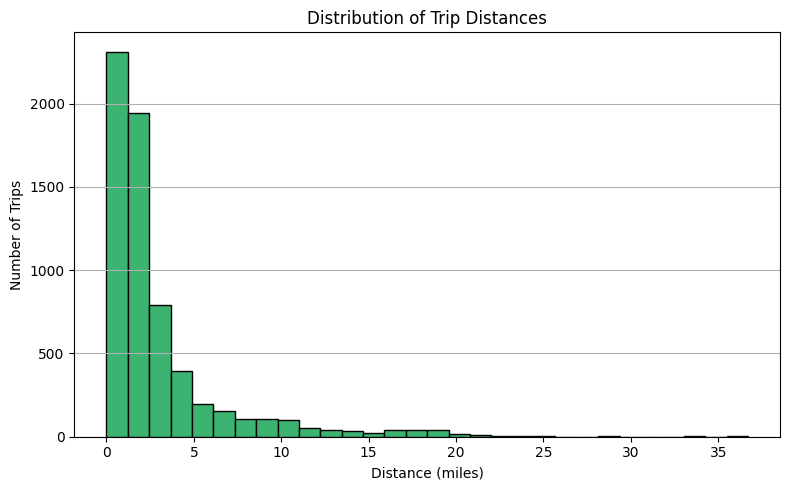

1

In [ ]:
# Plot histogram of distance
plt.figure(figsize=(8,5))
plt.hist(df['distance'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
1

<Figure size 800x500 with 0 Axes>

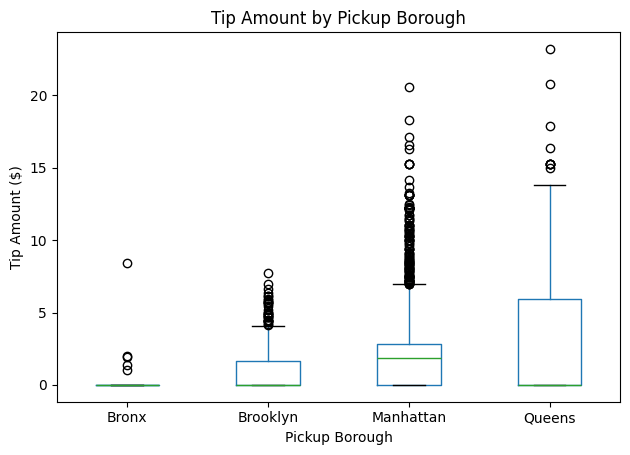

In [ ]:
# Create box plot of tip by pickup borough
plt.figure(figsize=(8,5))
df.boxplot(column='tip', by='pickup_borough', grid=False)
plt.title('Tip Amount by Pickup Borough')
plt.suptitle('')  # Removes automatic matplotlib title
plt.xlabel('Pickup Borough')
plt.ylabel('Tip Amount ($)')
plt.tight_layout()
plt.show()




# *Seaborn visualization*⚓





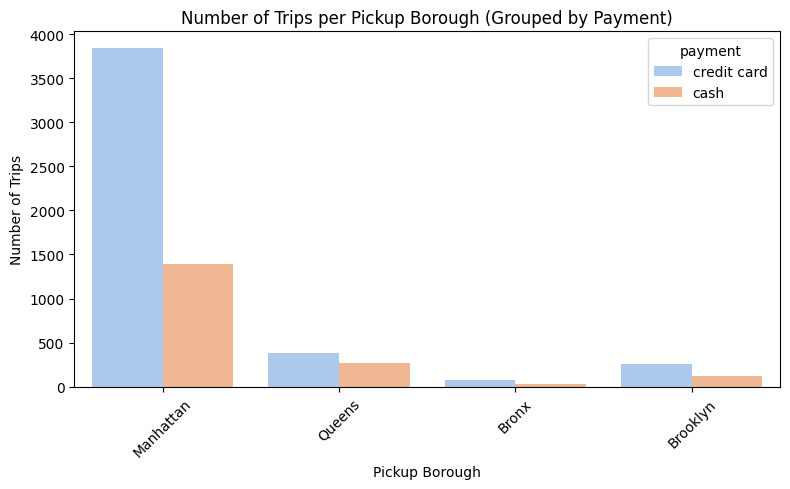

In [ ]:
#Number of trips in each pickup brough
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='pickup_borough', hue='payment', palette='pastel')
plt.title('Number of Trips per Pickup Borough (Grouped by Payment)')
plt.xlabel('Pickup Borough')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



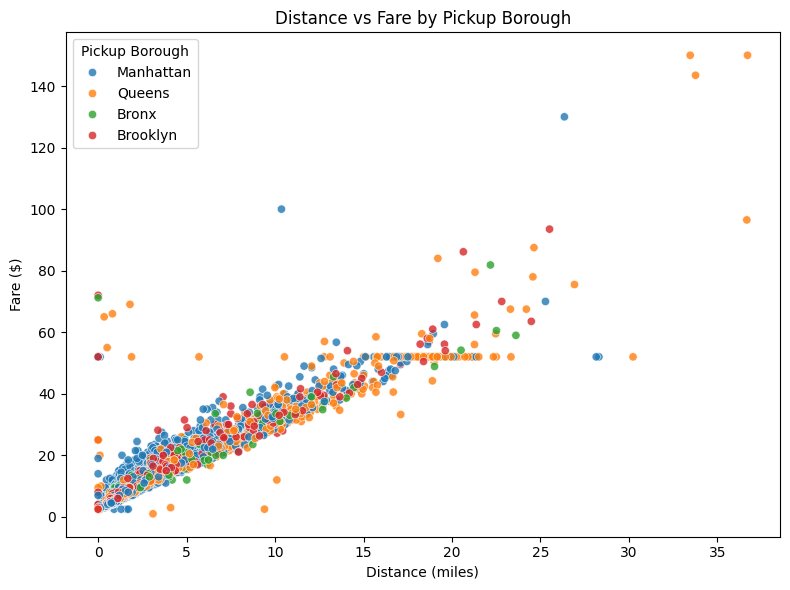

In [ ]:
#scatter plot Distance vs Fare
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='distance', y='fare', hue='pickup_borough', alpha=0.8)
plt.title('Distance vs Fare by Pickup Borough')
plt.xlabel('Distance (miles)')
plt.ylabel('Fare ($)')
plt.legend(title='Pickup Borough')
plt.tight_layout()
plt.show()


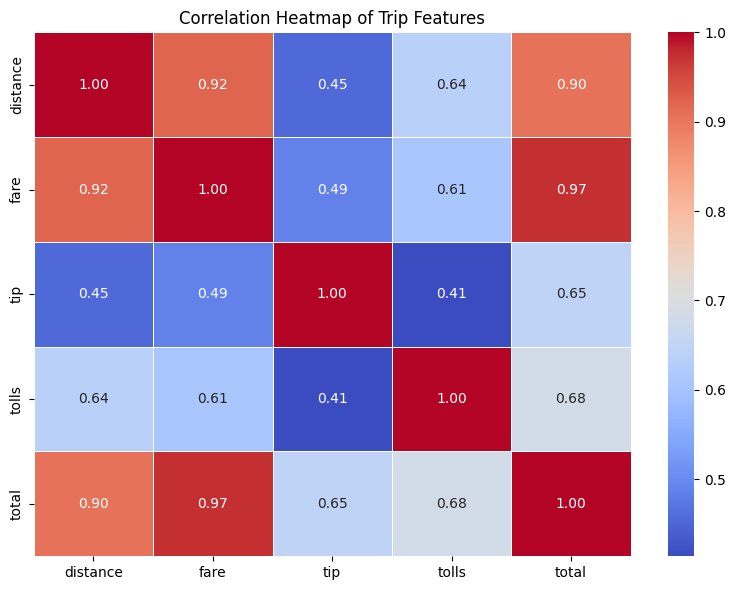

In [ ]:
#Heatmap  Correlation Between Numerical Features

# Select numerical features for correlation
num_cols = ['distance', 'fare', 'tip', 'tolls', 'total']
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Trip Features')
plt.tight_layout()
plt.show()


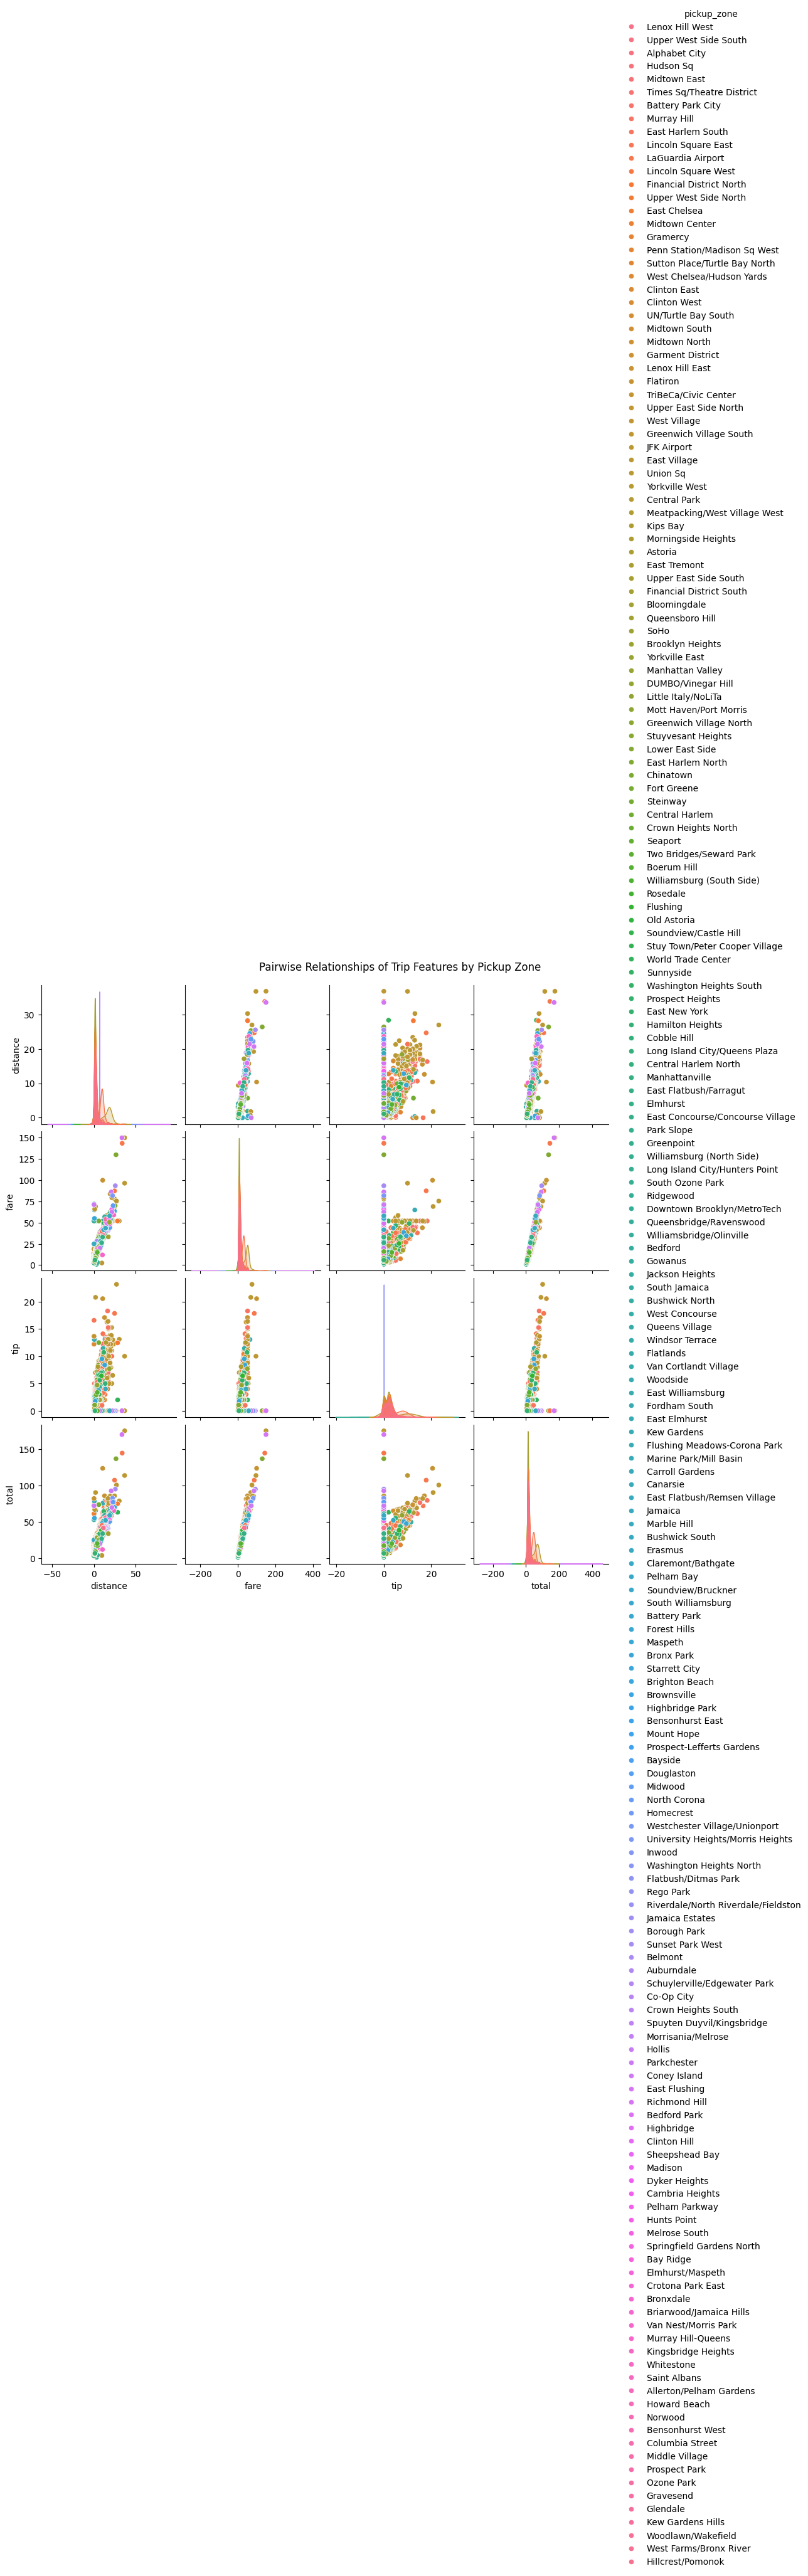

In [ ]:
# Pair Plot Pairwise Relationships Between Features

# Select relevant columns
pairplot_cols = ['distance', 'fare', 'tip', 'total', 'pickup_zone']

# Filter to avoid missing values
df_pair = df[pairplot_cols].dropna()

# Plot pair plot
sns.pairplot(df_pair, hue='pickup_zone', palette='husl')
plt.suptitle('Pairwise Relationships of Trip Features by Pickup Zone', y=1.02)
plt.show()


/tmp/ipython-input-45-1487261419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='payment', y='fare', palette='Set3', inner='box')


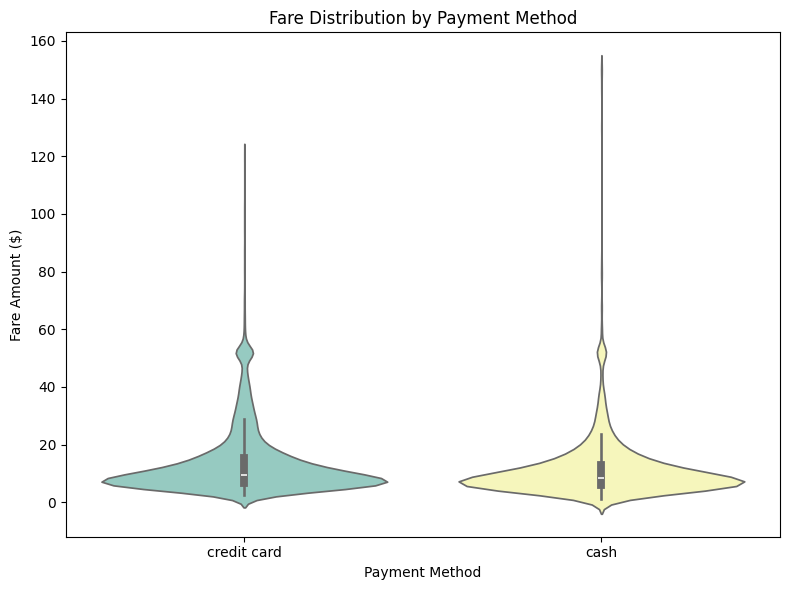

In [ ]:
#Violin Plot – Fare Distribution by Payment Method

plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='payment', y='fare', palette='Set3', inner='box')
plt.title('Fare Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Fare Amount ($)')
plt.tight_layout()
plt.show()
